# Classification 


In [1]:
import numpy as np
import pandas as pd
import json

In [2]:
from sklearn.manifold import Isomap, TSNE, MDS, LocallyLinearEmbedding
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# import sklearn.neighbors._base
# import sys
# sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [3]:
from missingpy import MissForest

In [4]:
df = pd.read_json('features_label.json')
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,class
0,-0.098792,0.246780,0.372182,-0.267302,-0.093455,0.154483,-0.149150,0.133048,-0.161907,-0.061863,...,0.000803,0.799012,0.216770,0.488889,0.288604,2,0.977778,3.893833,0.022222,None
1,-0.073662,0.345128,0.301814,-0.476560,0.025313,0.079780,-0.086261,0.161001,-0.147534,0.065079,...,0.001706,0.643200,0.207359,0.480000,0.288444,1,1.000000,3.384134,0.000000,None
2,-0.239538,0.217312,0.391495,-0.259332,-0.096260,0.049797,-0.015582,0.133139,-0.179384,-0.108626,...,-0.001383,0.581315,0.272105,0.470588,0.288175,3,0.882353,3.008596,0.117647,None


In [5]:
df['class'] = df['class'].astype('category')
df.groupby('class').size()

class
Q1      59
Q2    9974
Q4    9885
dtype: int64

In [6]:
from sklearn import preprocessing
categorical = ['class']
le = preprocessing.LabelEncoder()
df[categorical] = df[categorical].apply(lambda series: pd.Series(
    le.fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
))

In [7]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [8]:
# oversample = SMOTE()
# X, y = oversample.fit_resample(df.loc[df['class'].notnull()].reset_index(), df.loc[df['class'].notnull(),'class'])
# summarize the new class distribution
# counter = Counter(y)
# print(counter)

In [9]:
# len(pd.unique(X['index']))

In [10]:
df.groupby('class').size()

class
0.0      59
1.0    9974
2.0    9885
dtype: int64

In [11]:
df

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,class
0,-0.098792,0.246780,0.372182,-0.267302,-0.093455,0.154483,-0.149150,0.133048,-0.161907,-0.061863,...,0.000803,0.799012,0.216770,0.488889,0.288604,2,0.977778,3.893833,0.022222,NaN
1,-0.073662,0.345128,0.301814,-0.476560,0.025313,0.079780,-0.086261,0.161001,-0.147534,0.065079,...,0.001706,0.643200,0.207359,0.480000,0.288444,1,1.000000,3.384134,0.000000,NaN
2,-0.239538,0.217312,0.391495,-0.259332,-0.096260,0.049797,-0.015582,0.133139,-0.179384,-0.108626,...,-0.001383,0.581315,0.272105,0.470588,0.288175,3,0.882353,3.008596,0.117647,NaN
3,-0.228471,0.270015,0.455785,-0.271271,0.050026,0.108745,-0.159302,0.216017,-0.107940,-0.053101,...,0.000455,0.698962,0.227270,0.470588,0.288175,1,1.000000,3.486968,0.000000,NaN
4,-0.174997,0.296510,0.258443,-0.317369,-0.158371,0.158997,-0.053249,0.170265,-0.081173,-0.090188,...,0.000666,0.896030,0.083818,0.478261,0.288402,1,1.000000,4.280255,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232743,-0.186514,0.099457,0.393527,-0.186841,0.037206,0.140150,-0.143451,0.161884,-0.102061,0.058485,...,0.000060,0.647394,0.252082,0.499289,0.288675,2,0.998578,3.321696,0.001422,NaN
232744,-0.212278,0.177555,0.390303,-0.246410,-0.130181,0.186109,-0.030990,0.232672,-0.103300,0.034690,...,-0.000015,0.784241,0.210243,0.491228,0.288631,2,0.982456,3.925651,0.017544,NaN
232745,-0.116286,0.295733,0.404483,-0.161157,-0.175289,0.202572,-0.013252,0.300210,0.076071,-0.095648,...,0.000151,0.836601,0.142492,0.490196,0.288620,1,1.000000,4.070854,0.000000,NaN
232746,-0.093076,0.145227,0.372964,-0.218381,-0.008757,0.194206,-0.045708,0.268212,-0.103843,0.044485,...,-0.000085,0.789229,0.211758,0.496988,0.288670,2,0.993976,3.903552,0.006024,NaN


## Apply Missforest

In [12]:
%%time

imputer = MissForest(random_state=42, class_weight='balanced')
imputed = imputer.fit_transform(df, cat_vars=119)
imputed

Iteration: 0
Iteration: 1
Iteration: 2
CPU times: user 2min 32s, sys: 831 ms, total: 2min 33s
Wall time: 23.4 s


array([[-0.09879249,  0.24677985,  0.37218226, ...,  3.89383268,
         0.02222222,  1.        ],
       [-0.07366212,  0.345128  ,  0.30181372, ...,  3.38413365,
         0.        ,  1.        ],
       [-0.23953765,  0.21731229,  0.39149458, ...,  3.00859647,
         0.11764706,  1.        ],
       ...,
       [-0.11628602,  0.29573326,  0.40448253, ...,  4.0708538 ,
         0.        ,  1.        ],
       [-0.09307639,  0.14522664,  0.37296448, ...,  3.90355169,
         0.0060241 ,  1.        ],
       [-0.18077336,  0.1715945 ,  0.29286598, ...,  2.947734  ,
         0.00746269,  1.        ]])

In [13]:
cat_cols=['class']
imputed = pd.DataFrame(imputed, columns=df.columns.tolist())

In [14]:
imputed.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,class
0,-0.098792,0.246780,0.372182,-0.267302,-0.093455,0.154483,-0.149150,0.133048,-0.161907,-0.061863,...,0.000803,0.799012,0.216770,0.488889,0.288604,2.0,0.977778,3.893833,0.022222,1.0
1,-0.073662,0.345128,0.301814,-0.476560,0.025313,0.079780,-0.086261,0.161001,-0.147534,0.065079,...,0.001706,0.643200,0.207359,0.480000,0.288444,1.0,1.000000,3.384134,0.000000,1.0
2,-0.239538,0.217312,0.391495,-0.259332,-0.096260,0.049797,-0.015582,0.133139,-0.179384,-0.108626,...,-0.001383,0.581315,0.272105,0.470588,0.288175,3.0,0.882353,3.008596,0.117647,1.0
3,-0.228471,0.270015,0.455785,-0.271271,0.050026,0.108745,-0.159302,0.216017,-0.107940,-0.053101,...,0.000455,0.698962,0.227270,0.470588,0.288175,1.0,1.000000,3.486968,0.000000,1.0
4,-0.174997,0.296510,0.258443,-0.317369,-0.158371,0.158997,-0.053249,0.170265,-0.081173,-0.090188,...,0.000666,0.896030,0.083818,0.478261,0.288402,1.0,1.000000,4.280255,0.000000,1.0


In [15]:
imputed.groupby('class').size()

class
0.0        60
1.0    157847
2.0     74841
dtype: int64

In [16]:
metadata = pd.read_json('data_and_meta.json')
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232748 entries, 0 to 284530
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   index           232748 non-null  int64 
 1   reviewerID      232748 non-null  object
 2   asin            232748 non-null  object
 3   reviewerName    230910 non-null  object
 4   helpful         232748 non-null  object
 5   reviewText      232748 non-null  object
 6   overall         232748 non-null  int64 
 7   summary         232748 non-null  object
 8   unixReviewTime  232748 non-null  int64 
 9   reviewTime      232748 non-null  object
 10  features        232748 non-null  object
 11  amazonCategory  232748 non-null  object
 12  class           19918 non-null   object
 13  title           106284 non-null  object
 14  description     232748 non-null  object
 15  feature         232748 non-null  object
dtypes: int64(3), object(13)
memory usage: 30.2+ MB


In [17]:
imputed['CLASS'] = le.inverse_transform(imputed['class'].astype(int)[imputed['class'].notnull()])
imputed.groupby('CLASS').size()

CLASS
Q1        60
Q2    157847
Q4     74841
dtype: int64

In [18]:
imputed

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,class,CLASS
0,-0.098792,0.246780,0.372182,-0.267302,-0.093455,0.154483,-0.149150,0.133048,-0.161907,-0.061863,...,0.799012,0.216770,0.488889,0.288604,2.0,0.977778,3.893833,0.022222,1.0,Q2
1,-0.073662,0.345128,0.301814,-0.476560,0.025313,0.079780,-0.086261,0.161001,-0.147534,0.065079,...,0.643200,0.207359,0.480000,0.288444,1.0,1.000000,3.384134,0.000000,1.0,Q2
2,-0.239538,0.217312,0.391495,-0.259332,-0.096260,0.049797,-0.015582,0.133139,-0.179384,-0.108626,...,0.581315,0.272105,0.470588,0.288175,3.0,0.882353,3.008596,0.117647,1.0,Q2
3,-0.228471,0.270015,0.455785,-0.271271,0.050026,0.108745,-0.159302,0.216017,-0.107940,-0.053101,...,0.698962,0.227270,0.470588,0.288175,1.0,1.000000,3.486968,0.000000,1.0,Q2
4,-0.174997,0.296510,0.258443,-0.317369,-0.158371,0.158997,-0.053249,0.170265,-0.081173,-0.090188,...,0.896030,0.083818,0.478261,0.288402,1.0,1.000000,4.280255,0.000000,1.0,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232743,-0.186514,0.099457,0.393527,-0.186841,0.037206,0.140150,-0.143451,0.161884,-0.102061,0.058485,...,0.647394,0.252082,0.499289,0.288675,2.0,0.998578,3.321696,0.001422,1.0,Q2
232744,-0.212278,0.177555,0.390303,-0.246410,-0.130181,0.186109,-0.030990,0.232672,-0.103300,0.034690,...,0.784241,0.210243,0.491228,0.288631,2.0,0.982456,3.925651,0.017544,1.0,Q2
232745,-0.116286,0.295733,0.404483,-0.161157,-0.175289,0.202572,-0.013252,0.300210,0.076071,-0.095648,...,0.836601,0.142492,0.490196,0.288620,1.0,1.000000,4.070854,0.000000,1.0,Q2
232746,-0.093076,0.145227,0.372964,-0.218381,-0.008757,0.194206,-0.045708,0.268212,-0.103843,0.044485,...,0.789229,0.211758,0.496988,0.288670,2.0,0.993976,3.903552,0.006024,1.0,Q2


In [19]:
len(pd.unique(imputed.index))

232748

In [28]:
metadata = metadata.reset_index()

In [29]:
imputed=imputed.reset_index()

In [30]:
All = pd.merge(imputed,metadata, how='outer', on='index')

In [31]:
All

,index,0,1,2,3,4,5,6,7,8,...,overall,summary,unixReviewTime,reviewTime,features,amazonCategory,class_y,title,description,feature
0,0,-0.098792,0.246780,0.372182,-0.267302,-0.093455,0.154483,-0.149150,0.133048,-0.161907,...,4,Great,1356739200,"12 29, 2012","[-0.0987924889, 0.24677984890000002, 0.3721822...",health,None,None,,
1,1,-0.073662,0.345128,0.301814,-0.476560,0.025313,0.079780,-0.086261,0.161001,-0.147534,...,3,recieved OLD STOCK,1401840000,"06 4, 2014","[-0.07366212, 0.345128, 0.30181372, -0.4765604...",health,None,None,,
2,2,-0.239538,0.217312,0.391495,-0.259332,-0.096260,0.049797,-0.015582,0.133139,-0.179384,...,5,Great product.,1403049600,"06 18, 2014","[-0.2395376471, 0.2173122941, 0.3914945765, -0...",health,None,None,,
3,3,-0.228471,0.270015,0.455785,-0.271271,0.050026,0.108745,-0.159302,0.216017,-0.107940,...,5,Batteries,1357516800,"01 7, 2013","[-0.2284705294, 0.2700145882, 0.45578470590000...",health,None,None,,
4,4,-0.174997,0.296510,0.258443,-0.317369,-0.158371,0.158997,-0.053249,0.170265,-0.081173,...,5,Big bang for your buck...,1320105600,"11 1, 2011","[-0.1749965652, 0.2965097391, 0.2584427783, -0...",health,None,None,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232743,232743,-0.186514,0.099457,0.393527,-0.186841,0.037206,0.140150,-0.143451,0.161884,-0.102061,...,4,Very good case and battery with a limitation,1250467200,"08 17, 2009","[-0.1865138805, 0.0994569393, 0.39352668090000...",mobile,None,Mophie Juice Pack Air Case and Rechargeable Ba...,The Juice Pack Air is a rechargeable external ...,iPhone case and battery pack protects and adds...
232744,232744,-0.212278,0.177555,0.390303,-0.246410,-0.130181,0.186109,-0.030990,0.232672,-0.103300,...,1,garbage,1301961600,"04 5, 2011","[-0.2122780702, 0.177555193, 0.390302733300000...",mobile,None,Mophie Juice Pack Air Case and Rechargeable Ba...,The Juice Pack Air is a rechargeable external ...,iPhone case and battery pack protects and adds...
232745,232745,-0.116286,0.295733,0.404483,-0.161157,-0.175289,0.202572,-0.013252,0.300210,0.076071,...,5,Good backup charger!,1391990400,"02 10, 2014","[-0.1162860196, 0.2957332569, 0.4044825294, -0...",mobile,None,Mophie Juice Pack Air Case and Rechargeable Ba...,The Juice Pack Air is a rechargeable external ...,iPhone case and battery pack protects and adds...
232746,232746,-0.093076,0.145227,0.372964,-0.218381,-0.008757,0.194206,-0.045708,0.268212,-0.103843,...,1,Barely works,1283990400,"09 9, 2010","[-0.0930763855, 0.1452266367, 0.37296447860000...",mobile,None,Mophie Juice Pack Air Case and Rechargeable Ba...,The Juice Pack Air is a rechargeable external ...,iPhone case and battery pack protects and adds...


In [32]:
All.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232748 entries, 0 to 232747
Data columns (total 138 columns):
 #    Column          Non-Null Count   Dtype  
---   ------          --------------   -----  
 0    index           232748 non-null  int64  
 1    0               232748 non-null  float64
 2    1               232748 non-null  float64
 3    2               232748 non-null  float64
 4    3               232748 non-null  float64
 5    4               232748 non-null  float64
 6    5               232748 non-null  float64
 7    6               232748 non-null  float64
 8    7               232748 non-null  float64
 9    8               232748 non-null  float64
 10   9               232748 non-null  float64
 11   10              232748 non-null  float64
 12   11              232748 non-null  float64
 13   12              232748 non-null  float64
 14   13              232748 non-null  float64
 15   14              232748 non-null  float64
 16   15              232748 non-null  flo

In [33]:
col = [ column for column in All.columns if column not in ['class_y','class_x','reviewerName','features']]
All = All[col]

In [34]:
All.iloc[200000,-13:].values

array([243291, 'A3CL8YYFDPLLWH', 'B004DLPXAO', list([0, 0]),
       "Originally got this for my knock-off IPad (called YourPad) and it worked fine for a while, then got glitchy and wouldn't open the book.  Tried removing & reinstalling, however that didn't work.  Got out the CHEAPER knock-off (iBridge), installed Kindle for Android and it has worked PERFECTLY ever since (knock on wood).  I love that I can take my current reading material ANYWHERE and read while I'm waiting at the Drs office or whereever.  Not my favorite app, but probably the most used one.",
       4, 'I love this APP!', 1349136000, '10 2, 2012', 'apps_android',
       None, '', ''], dtype=object)

In [35]:
All.iloc[230000,-13:].values

array([281783, 'A3GIA221CVY1A1', 'B001LRPN0S', list([0, 0]),
       'This charger works great for my  Verizon branded Samsung Galaxy SIII S3 S 3 S III.  Just as you would expect.',
       5, 'Works great on my Galaxy S III', 1372809600, '07 3, 2013',
       'mobile', None, '', ''], dtype=object)

In [36]:
categorical = ['CLASS']  
le = preprocessing.LabelEncoder()
All['target'] = le.fit_transform(All['CLASS']) 

<ipython-input-36-54cfdaa5d4b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All['target'] = le.fit_transform(All['CLASS'])


In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.manifold import Isomap, TSNE, MDS, LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB

In [38]:
All.groupby('target').size()

target
0        60
1    157847
2     74841
dtype: int64

## Applying TF-IDF:

In [39]:
%%time

X_ = All['reviewText']
y_ = All['target']

pipe = Pipeline([('vectorizer', CountVectorizer()),  
                 ('tfidf', TfidfTransformer()), 
                 ('classifier', RandomForestClassifier(n_jobs=5, max_depth=13))])

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)

classifier = pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.74      1.00      0.85     52114
           2       1.00      0.24      0.39     24669

    accuracy                           0.76     76807
   macro avg       0.58      0.41      0.41     76807
weighted avg       0.82      0.76      0.70     76807

CPU times: user 43.6 s, sys: 4.89 s, total: 48.5 s
Wall time: 25.8 s


/home/pedro/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pedro/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pedro/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
confusion_matrix(y_test, y_pred)

array([[    0,    24,     0],
       [    0, 52088,    26],
       [    0, 18712,  5957]])

Confusion matrix, without normalization
[[    0    24     0]
 [    0 52088    26]
 [    0 18712  5957]]
Normalized confusion matrix
[[0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.99501094e-01 4.98906244e-04]
 [0.00000000e+00 7.58522842e-01 2.41477158e-01]]


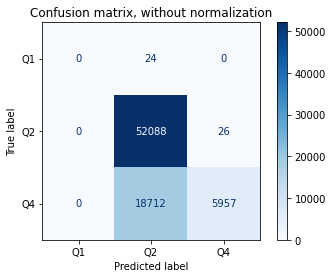

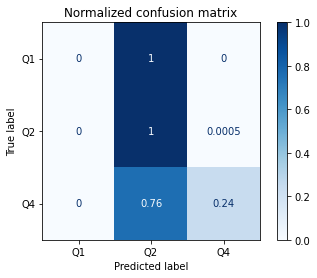

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

class_names= ['Q1','Q2', 'Q4']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Applying Glove features:

In [42]:
from sklearn.ensemble import RandomForestClassifier

X_ =  All.iloc[:,1:120]
y_ = All['target']

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_jobs=5, max_depth=13))])

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)


classifier = pipe.fit(X_train, y_train)

In [43]:
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.95      0.98      0.96     52114
           2       0.95      0.89      0.92     24669

    accuracy                           0.95     76807
   macro avg       0.63      0.62      0.63     76807
weighted avg       0.95      0.95      0.95     76807



/home/pedro/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pedro/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pedro/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix, without normalization
[[    0    24     0]
 [    0 51070  1044]
 [    0  2824 21845]]
Normalized confusion matrix
[[0.         1.         0.        ]
 [0.         0.979967   0.020033  ]
 [0.         0.11447566 0.88552434]]


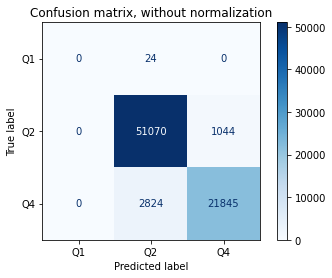

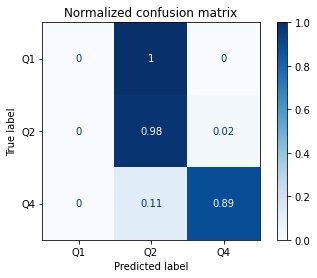

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

class_names= ['Q1','Q2', 'Q4']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [45]:
pd.DataFrame(pipe.steps[1][1].feature_importances_).rename(columns={0:'gini'}).sort_values(by='gini', ascending=False)

,gini
86,0.127165
41,0.082952
63,0.082937
5,0.043539
19,0.043051
...,...
110,0.000981
116,0.000797
118,0.000563
115,0.000278
